# import libraries

In [1]:
import numpy as np
import pandas as pd
import pymysql
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from drive_and_win_bib import *

In [2]:
normal_test = pd.read_csv('normal_test_processed.csv')

In [3]:
normal_test

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,Vmoy,RPMMoy,VVAR,VRPM,Target
0,0.0,1.0,-7.840662,106.539386,25.852668,48.18438,15.957182,0.154,3.140,9.378,...,8.125,17.572003,-18.015996,26.102998,57.503921,24.105733,19.120963,24.236434,1202.045736,normal_non_confirmed
1,0.0,1.0,13.844994,388.682296,-114.298019,46.79502,-8.471007,-0.370,0.887,9.292,...,8.835,0.305528,-2.267668,17.152625,72.726909,14.197180,17.583619,23.911893,1872.501170,normal_non_confirmed
2,0.0,1.0,37.000000,3011.000000,0.000000,41.00000,18.400000,-0.541,2.967,9.496,...,9.102,14.440646,-0.169372,26.308521,63.728894,39.800000,27.306000,6.196773,710.724075,normal_non_confirmed
3,0.0,1.0,38.000000,1821.000000,0.000000,42.00000,15.700000,-0.101,2.484,9.416,...,8.842,6.919194,-1.728073,26.516590,63.456307,42.100000,20.587000,11.628031,621.992149,normal_non_confirmed
4,0.0,1.0,0.000000,843.000000,16.500000,42.00000,14.100000,-0.378,3.398,9.199,...,8.911,2.710881,-4.517661,26.217593,63.374707,8.300000,13.357000,7.631077,621.363384,normal_non_confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,1.0,11.000000,1734.000000,12.500000,43.00000,14.900000,-0.857,3.233,8.730,...,8.770,1.536328,-5.341958,25.238004,64.162104,32.000000,25.924000,20.537229,1107.239831,normal_non_confirmed
194,0.0,1.0,11.000000,2780.000000,50.200000,42.00000,23.900000,-0.483,5.178,8.550,...,8.406,5.502452,-8.276529,24.495666,64.004345,30.100000,24.171000,10.027185,599.260554,normal_non_confirmed
195,0.0,1.0,29.000000,2367.000000,12.200000,42.00000,23.900000,-0.531,4.516,8.767,...,9.000,2.094572,-2.583042,18.503466,71.342111,27.000000,20.944000,6.342099,602.217975,normal_non_confirmed
196,1.0,0.0,37.000000,2471.000000,51.400000,28.00000,29.400000,3.614,4.347,7.948,...,9.503,6.253573,-2.614785,20.771131,69.087746,76.900000,28.590000,20.523428,392.401722,normal_non_confirmed


In [4]:
agressif_test = pd.read_csv('agressif_test_processed.csv')
agressif_test_non_reshaped = pd.read_csv('agressif_test.csv')

In [5]:
#dangerous_test = pd.read_csv('dangerous_test_processed.csv')
#dangerous_test_non_reshaped = pd.read_csv('dangerous_test.csv')

In [6]:
#dangerous_test


In [7]:
#df_final = pd.concat([normal_data_non_zero, agressif_data_non_zero, dangerous_data_non_zero, timid_data_non_zero], sort=False)


In [8]:
#df_final_maj = pd.concat([df_final, added_normal_df, added_agressif_df], sort=False)


In [9]:
#df_final=df_final.reset_index(drop=True)

### train test split

In [10]:
normal_non_confirmed_sc = normal_test.drop('Target', axis=1)
ss=StandardScaler()
ss.fit(normal_non_confirmed_sc)
normal_non_confirmed_sc = ss.transform(normal_non_confirmed_sc)
print(normal_non_confirmed_sc)



[[-0.83205029  0.83205029 -1.83363678 ... -0.94852141  1.09010232
   1.77479572]
 [-0.83205029  0.83205029 -1.04835565 ... -1.29347097  1.05277189
   4.25573405]
 [-0.83205029  0.83205029 -0.2098664  ...  0.88803961 -0.98491429
  -0.04327999]
 ...
 [-0.83205029  0.83205029 -0.49956246 ... -0.53946779 -0.96819814
  -0.44479355]
 [ 1.20185043 -1.20185043 -0.2098664  ...  1.1761439   0.66301285
  -1.22119293]
 [ 1.20185043 -1.20185043  1.49209792 ... -1.36743105  1.20619125
   1.15995983]]


In [11]:
normal_non_confirmed_sc

array([[-0.83205029,  0.83205029, -1.83363678, ..., -0.94852141,
         1.09010232,  1.77479572],
       [-0.83205029,  0.83205029, -1.04835565, ..., -1.29347097,
         1.05277189,  4.25573405],
       [-0.83205029,  0.83205029, -0.2098664 , ...,  0.88803961,
        -0.98491429, -0.04327999],
       ...,
       [-0.83205029,  0.83205029, -0.49956246, ..., -0.53946779,
        -0.96819814, -0.44479355],
       [ 1.20185043, -1.20185043, -0.2098664 , ...,  1.1761439 ,
         0.66301285, -1.22119293],
       [ 1.20185043, -1.20185043,  1.49209792, ..., -1.36743105,
         1.20619125,  1.15995983]])

In [12]:
# Normal test
# linear regression LR
import pickle
filename = 'LR_model.sav'
LR_model = pickle.load(open(filename, 'rb'))
pred_LR=LR_model.predict(normal_non_confirmed_sc)



# Decision Tree  DT
filename = 'DT_model.sav'
DT_model = pickle.load(open(filename, 'rb'))
pred_DT=DT_model.predict(normal_non_confirmed_sc)


# SVC 

filename = 'svm_model.h5'
SVC_model = pickle.load(open(filename, 'rb'))
pred_SVC=SVC_model.predict(normal_non_confirmed_sc)


# KNN 4
filename = 'KNN_4_model.sav'
KNN_4_model = pickle.load(open(filename, 'rb'))
pred_KNN_4=KNN_4_model.predict(normal_non_confirmed_sc)
# KNN 1
filename = 'KNN_1_model.sav'
KNN_1_model = pickle.load(open(filename, 'rb'))
pred_KNN_1=KNN_1_model.predict(normal_non_confirmed_sc)

# Random forest RF
filename = 'RF_model.sav' 
RF_model = pickle.load(open(filename, 'rb'))
pred_RF=RF_model.predict(normal_non_confirmed_sc)


In [13]:
pred_RF

array(['normal', 'normal', 'dangerous', 'dangerous', 'timid', 'dangerous',
       'dangerous', 'normal', 'dangerous', 'dangerous', 'normal',
       'normal', 'normal', 'dangerous', 'normal', 'normal', 'normal',
       'normal', 'dangerous', 'dangerous', 'normal', 'dangerous',
       'dangerous', 'dangerous', 'dangerous', 'normal', 'dangerous',
       'dangerous', 'dangerous', 'dangerous', 'dangerous', 'dangerous',
       'normal', 'dangerous', 'dangerous', 'dangerous', 'normal',
       'dangerous', 'normal', 'dangerous', 'dangerous', 'normal',
       'dangerous', 'dangerous', 'dangerous', 'normal', 'normal',
       'dangerous', 'dangerous', 'dangerous', 'dangerous', 'normal',
       'dangerous', 'normal', 'normal', 'dangerous', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'nor

In [14]:
normal_test['Target']="normal_non_confirmed"
for i in range (0, len(normal_non_confirmed_sc)):
    
    if ((pred_RF[i]== "normal") & (pred_SVC[i]== "normal") & (pred_LR[i]== "normal")):
        print(pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] ) #
        normal_test['Target'][i]='normal'
        print(i)
    else:
        print("oupss", pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] )#
        normal_test['Target'][i]='abnormal'
        #print(type(pred_RF[i]))

normal normal normal normal normal
0
normal normal normal timid normal
1
oupss dangerous normal dangerous dangerous dangerous
oupss dangerous normal dangerous normal dangerous
oupss timid normal timid timid timid
oupss dangerous normal dangerous dangerous dangerous
oupss dangerous dangerous dangerous agressif dangerous
normal normal normal normal normal
7
oupss dangerous normal normal agressif agressif
oupss dangerous normal dangerous agressif dangerous
oupss normal normal normal normal dangerous
normal normal normal normal normal
11
normal normal normal normal normal
12
oupss dangerous normal agressif agressif normal
oupss normal normal agressif agressif agressif
normal normal normal normal normal
15
normal normal normal dangerous normal
16
oupss normal timid dangerous normal normal
oupss dangerous dangerous dangerous agressif agressif
oupss dangerous dangerous dangerous dangerous dangerous
oupss normal agressif agressif normal dangerous
oupss dangerous agressif dangerous dangerous da

<ipython-input-14-bde58ef0602f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_test['Target'][i]='normal'
<ipython-input-14-bde58ef0602f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_test['Target'][i]='abnormal'


 dangerous dangerous
oupss dangerous normal normal dangerous dangerous
oupss normal normal normal normal dangerous
oupss dangerous normal normal dangerous normal
oupss timid timid timid timid timid
oupss normal normal normal agressif dangerous
oupss normal normal dangerous normal agressif
oupss normal normal normal dangerous agressif
normal timid normal normal normal
158
normal normal normal normal normal
159
oupss normal agressif agressif dangerous normal
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous normal agressif dangerous dangerous
oupss dangerous normal dangerous normal dangerous
oupss dangerous normal dangerous normal dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous normal dangerous dangerous dangerous
oupss normal normal normal timid timid
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous

In [15]:
normal_test['Target']

0        normal
1        normal
2      abnormal
3      abnormal
4      abnormal
         ...   
193    abnormal
194      normal
195      normal
196    abnormal
197      normal
Name: Target, Length: 198, dtype: object

In [16]:
#print(normal_non_confirmed_sc)

In [17]:
agressif_non_confirmed_sc = agressif_test.drop('Target', axis=1)
ss=StandardScaler()
ss.fit(agressif_non_confirmed_sc)
agressif_non_confirmed_sc = ss.transform(agressif_non_confirmed_sc)

In [18]:
#aggressif_non_confirmed_sc

#linear regression LR
filename = 'LR_model.sav' 
LR_model = pickle.load(open(filename, 'rb')) 
pred_LR=LR_model.predict(agressif_non_confirmed_sc)

#Decision Tree DT
filename = 'DT_model.sav' 
DT_model = pickle.load(open(filename, 'rb')) 
pred_DT=DT_model.predict(agressif_non_confirmed_sc)

#SVC
filename = 'svm_model.h5' 
SVC_model = pickle.load(open(filename, 'rb')) 
pred_SVC=SVC_model.predict(agressif_non_confirmed_sc)

#KNN
filename = 'KNN_4_model.sav' 
KNN_4_model = pickle.load(open(filename, 'rb')) 
pred_KNN_4=KNN_4_model.predict(agressif_non_confirmed_sc)

#Random forest RF
filename = 'RF_model.sav' 
RF_model = pickle.load(open(filename, 'rb')) 
pred_RF=RF_model.predict(agressif_non_confirmed_sc)

### Start classification

In [19]:
pred_RF

array(['dangerous', 'agressif', 'dangerous', 'normal', 'normal', 'normal',
       'normal', 'normal', 'dangerous', 'dangerous', 'dangerous',
       'dangerous', 'dangerous', 'dangerous', 'normal', 'normal',
       'dangerous', 'dangerous', 'normal', 'dangerous', 'dangerous',
       'dangerous', 'normal', 'normal', 'normal', 'normal', 'dangerous',
       'normal', 'normal', 'normal', 'normal', 'dangerous', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'dangerous', 'dangerous',
       'dangerous', 'dangerous', 'normal', 'dangerous', 'timid', 'normal',
       'normal', 'dangerous', 'dangerous', 'dangerous', 'dangerous',
       'normal', 'dangerous', 'normal', 'dangerous', 'normal',
       'dangerous', 'normal', 'dangerous', 'normal', 'normal',
       'dangerous', 'dangerous', 'dangerous', 'normal', 'normal',
       'dangerous', 'normal', 'normal', 'dangerous', 'normal', 'normal',
       'dangerous', 'dangerous', 'dangerou

#### Standarization

In [20]:
agressif_test['Target']="agressif_non_confirmed"
for i in range (0, len(agressif_non_confirmed_sc)):
    
    if ((pred_RF[i]== "agressif") & (pred_SVC[i]== "agressif") & (pred_LR[i]== "agressif")):
        print(pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] ) #
        agressif_test['Target'][i]='agressif'
        print(i)
    else:
        print("oupss", pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] )#
        agressif_test['Target'][i]='abnormal'
        #print(type(pred_RF[i]))

oupss dangerous normal normal dangerous normal
oupss agressif normal agressif dangerous normal
oupss dangerous dangerous dangerous dangerous dangerous
oupss normal normal normal dangerous normal
oupss normal normal normal normal agressif
oupss normal dangerous normal timid agressif
oupss normal normal normal timid timid
oupss normal normal normal agressif dangerous
oupss dangerous agressif dangerous dangerous agressif
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous dangerous dangerous
oupss normal normal normal normal agressif
oupss normal normal normal normal normal
oupss dangerous dangerous dangerous dangerous dangerous
oupss dangerous dangerous dangerous normal dangerous
oupss normal dangerous dangerous normal normal
oupss dangerous dangerous dangerous dangerous dangerous
ou

<ipython-input-20-825477295eea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agressif_test['Target'][i]='abnormal'


In [21]:
import pickle


In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
dangerous_non_confirmed_sc = dangerous_test.drop('Target', axis=1)
ss=StandardScaler()
ss.fit(dangerous_non_confirmed_sc)
dangerous_non_confirmed_sc = ss.transform(dangerous_non_confirmed_sc)

NameError: name 'dangerous_test' is not defined

In [ ]:
# linear regression LR

filename = 'LR_model.sav'
LR_model = pickle.load(open(filename, 'rb'))
pred_LR=LR_model.predict(dangerous_non_confirmed_sc)



# Decision Tree  DT
filename = 'DT_model.sav'
DT_model = pickle.load(open(filename, 'rb'))
pred_DT=DT_model.predict(dangerous_non_confirmed_sc)


# SVC 

filename = 'svm_model.h5'
SVC_model = pickle.load(open(filename, 'rb'))
pred_SVC=SVC_model.predict(dangerous_non_confirmed_sc)


# KNN
filename = 'KNN_4_model.sav'
KNN_4_model = pickle.load(open(filename, 'rb'))
pred_KNN_4=KNN_4_model.predict(dangerous_non_confirmed_sc)


# Random forest RF
filename = 'RF_model.sav' 
RF_model = pickle.load(open(filename, 'rb'))
pred_RF=RF_model.predict(dangerous_non_confirmed_sc)


In [25]:
dangerous_test['Target']='dangerous_non_confirmed'
for i in range (0, len(dangerous_non_confirmed_sc)):
    if pred_RF[i]== "timid": 
        print(dangerous_test_non_reshaped['Speed'][i:i+10], dangerous_test_non_reshaped['Urbaine'][i:i+10])
    
    if ((pred_RF[i]== "dangerous") & (pred_SVC[i]== "dangerous") & (pred_LR[i]== "dangerous")):
        print(pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] ) #
        x_test_dangerous['Target'][i]='dangerous'
        print(i)
    else:
        print("oupss", pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] )#
        dangerous_test['Target'][i]='abnormal'
        #print(type(pred_RF[i]))

NameError: name 'dangerous_test' is not defined

In [26]:
dangerous_test['Target']='dangerous_non_confirmed'
for i in range (0, len(dangerous_non_confirmed_sc)):
    if pred_RF[i]== "timid": 
        print(dangerous_test_non_reshaped['Speed'][i:i+10], dangerous_test_non_reshaped['Urbaine'][i:i+10])
    
    if ((pred_RF[i]== "dangerous") & (pred_KNN_4[i]== "dangerous") & (pred_SVC[i]== "dangerous") & (pred_DT[i]== "dangerous") & (pred_LR[i]== "dangerous")):
        print(pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] ) #
        x_test_dangerous['Target'][i]='dangerous'
        print(i)
    else:
        print("oupss", pred_RF[i], pred_KNN_4[i], pred_SVC[i], pred_DT[i], pred_LR[i] )#
        dangerous_test['Target'][i]='abnormal'
        #print(type(pred_RF[i]))


NameError: name 'dangerous_test' is not defined

In [27]:
plt.plot(dangerous_test_non_reshaped['Speed'])

NameError: name 'dangerous_test_non_reshaped' is not defined

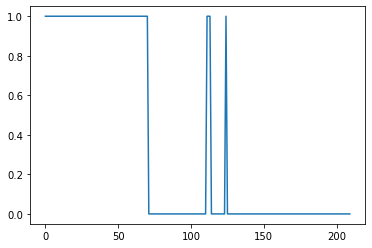

In [29]:
plt.plot(dangerous_test_non_reshaped['Urbaine'])
#dangerous_test_non_reshaped

In [30]:
dangerous_test_non_reshaped

,Route_Nat,Urbaine,Speed,RPM,Engine_Load,AmbientAir_Temp,Throttle_Pos,X,Y,Z,Angle_Rot,acc_angX,acc_angY,acc_angZ,Target
0,0,1,0.0,181.0,0.0,49.0,16.5,-0.029,3.268,9.138,140.549163,-0.171284,19.686674,70.350565,dangerous_non_confirmed
1,0,1,0.0,894.0,22.4,49.0,16.5,0.043,3.351,9.169,14.098520,0.252479,20.084156,69.952165,dangerous_non_confirmed
2,0,1,13.0,1941.0,86.7,49.0,88.2,-0.273,5.903,8.727,9.197755,-1.484905,34.076074,55.920540,dangerous_non_confirmed
3,0,1,36.0,4051.0,0.0,49.0,19.6,0.052,4.787,8.613,8.180661,0.302481,29.076613,60.959553,dangerous_non_confirmed
4,0,1,54.0,4338.0,100.0,49.0,88.2,-0.611,2.020,9.615,28.823891,-3.560085,11.846428,77.653338,dangerous_non_confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,0,94.0,3245.0,98.8,35.0,88.2,-1.158,8.923,1.388,0.073070,-7.310522,78.581183,8.773001,dangerous_non_confirmed
206,1,0,101.0,3572.0,100.0,35.0,88.2,-0.516,8.978,2.240,0.961467,-3.193107,75.670866,13.992950,dangerous_non_confirmed
207,1,0,109.0,3837.0,100.0,35.0,88.2,-0.728,9.431,2.403,2.769261,-4.279695,75.123460,14.260041,dangerous_non_confirmed
208,1,0,116.0,4054.0,100.0,35.0,88.2,-0.041,8.473,1.797,1.875287,-0.271329,78.055785,11.979097,dangerous_non_confirmed


In [85]:
added_data = pd.concat([normal_test, agressif_test], sort=False)
group = added_data.groupby('Target')

added_normal_df = group.get_group('normal')
added_agressif_df = group.get_group('agressif')
#dangerous_df = group.get_group('dangerous')

added_normal_df =added_normal_df.reset_index(drop=True)
added_agressif_df = added_agressif_df.reset_index(drop=True)
#dangerous_df =dangerous_df.reset_index(drop=True)# eliminate Target value 




#normal_df = normal_df.iloc[:, :-1] 
#agressif_df = agressif_df.iloc[:, :-1]
#dangerous_df = dangerous_df.iloc[:, :-1]
#timid_df = timid_df.iloc[:, :-1]

In [25]:
added_normal_df.to_csv(r'added_normal_df.csv', index=False)
added_agressif_df.to_csv(r'added_agressif_df.csv', index=False)

In [26]:
df_before = pd.read_csv('df_before.csv')

In [27]:
added_data = pd.concat([df_before, added_normal_df, added_agressif_df], sort=False)

In [28]:
added_data.to_csv(r'added_data.csv', index=False)

In [29]:
added_data

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,Vmoy,RPMMoy,VVAR,VRPM,Target
0,0.0,1.0,0.0,0.0,88.6,49.0,11.4,-0.017,3.564,8.619,...,9.107,35.566445,0.877697,23.444338,66.575299,7.3,11.700,5.793675,592.434900,normal
1,0.0,1.0,23.0,1881.0,62.4,49.0,24.3,1.783,3.938,9.777,...,8.726,1.390061,-1.514328,24.301568,65.683185,34.7,22.326,9.452219,412.156173,normal
2,0.0,1.0,47.0,2281.0,32.9,49.0,20.8,-0.021,3.732,9.291,...,10.892,6.506525,-1.345081,18.135501,71.849249,45.9,19.548,10.181137,359.211730,normal
3,0.0,1.0,36.0,1250.0,0.0,49.0,15.3,0.059,2.035,9.434,...,9.953,40.018152,-8.639787,9.679846,77.007335,26.4,16.560,14.878769,801.079549,normal
4,0.0,1.0,14.0,1177.0,30.6,49.0,19.6,0.296,4.645,9.127,...,8.532,0.187987,-1.179926,25.742231,64.264780,29.8,18.213,8.586812,506.451281,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.0,1.0,30.0,2448.0,32.5,44.0,23.5,-2.887,9.370,-1.258,...,0.314,2.541628,-14.074467,75.840001,1.831667,58.3,29.248,20.795566,663.897716,agressif
3,1.0,0.0,106.0,3720.0,55.7,49.0,30.2,-0.478,10.044,1.764,...,3.023,3.147982,-3.490756,72.674312,16.987308,109.7,33.063,1.766981,332.060921,agressif
4,1.0,0.0,110.0,3073.0,89.8,49.0,44.3,-1.048,9.769,3.835,...,1.712,1.240488,-10.118365,75.014581,10.987839,110.1,30.926,2.558211,72.815139,agressif
5,1.0,0.0,113.0,3212.0,89.4,49.0,27.5,-1.495,9.465,1.443,...,1.410,1.018664,-9.220353,77.346482,8.645318,113.3,31.864,1.159502,36.661212,agressif
